# 库导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
from joblib import Parallel, delayed
import multiprocessing
import datetime
import statsmodels.api as sm
import seaborn
from sklearn.metrics import classification_report
import talib as ta
from sympy import *

from scipy import stats

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

# 独立事件的和事件概率

In [2]:
X = list(np.arange(1,1001))
# X_sq = [2*x for x in np.arange(1,100)]
p = 0.00001
Y = [1-(1-p)**(x**2) for x in X]
# Y = [1-(1-p)**(x) for x in X]
Y_sq = [x**2/100000000 for x in X]
# Y_sq = [pow(2,x)/10000 for x in X]

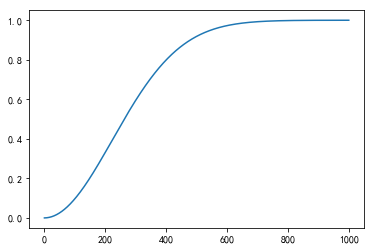

In [3]:
plt.plot(X,Y)
# plt.plot(X,Y_sq)
# plt.plot()
plt.show()

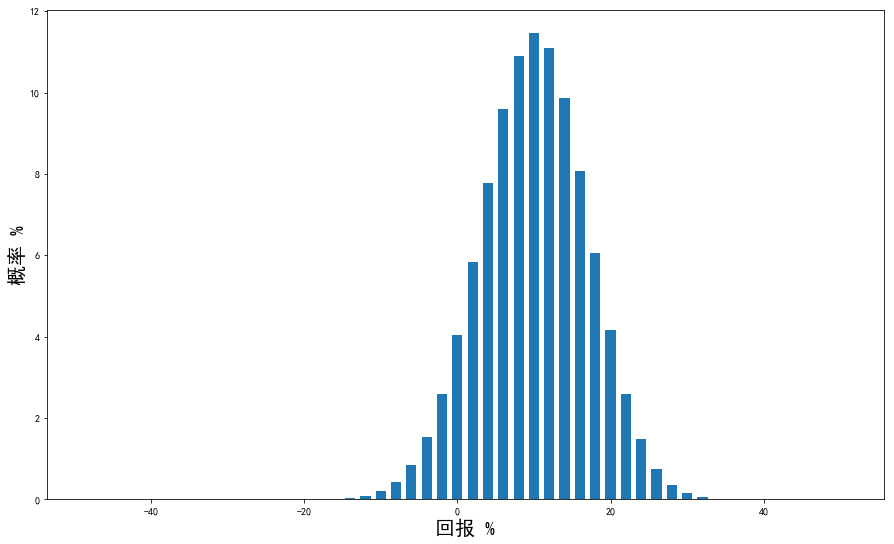

In [37]:
N = 50
prob = [stats.binom.pmf(i,N,0.6)*100 for i in range(1,N+1)]
x_of_prob_str = [str(100*(i/N-0.5))+'%' for i in range(1,N+1)]
x_of_prob = [(i/N-0.5)*100 for i in range(1,N+1)]
plt.figure(figsize=(15,9))
plt.bar(x_of_prob,prob,width = (x_of_prob[-1]-x_of_prob[-2])*2/3)
plt.xlabel('回报 %',fontsize=20)
plt.ylabel('概率 %',fontsize=20)
plt.show()

$$ 中心极限定理 $$

$$ 每次投注的成功次数,X_i\sim B(1,p) $$

$$ 总成功次数,X=\Sigma_{i=1}^{N}X_i\sim B(N,p) $$

$$ CDF_\overline{X}(x)=Pr\begin{Bmatrix}\frac{\Sigma_{i=1}^{N}X_i-Np}{Np(1-p)}\leq x\end{Bmatrix}\approx\Phi(x),\overline{X} \sim Normal(0,1) $$

$$ X=\Sigma_{i=1}^{N}X_i\sim Normal(Np,Np(1-p)),较大的N $$

$$ 总收益,R=X\times(r_w/N)+(N-X)\times(r_l/N)\sim Normal((r_w-r_l)p+r_l,(r_w-r_l)^2p(1-p)/N) $$

$$ SharpeRatio=\frac{5\%}{\sqrt {\frac{6}{25N}}} $$

$$ Sharpe Ratio=\frac{E[r_P]-r_f}{\sigma_P} $$

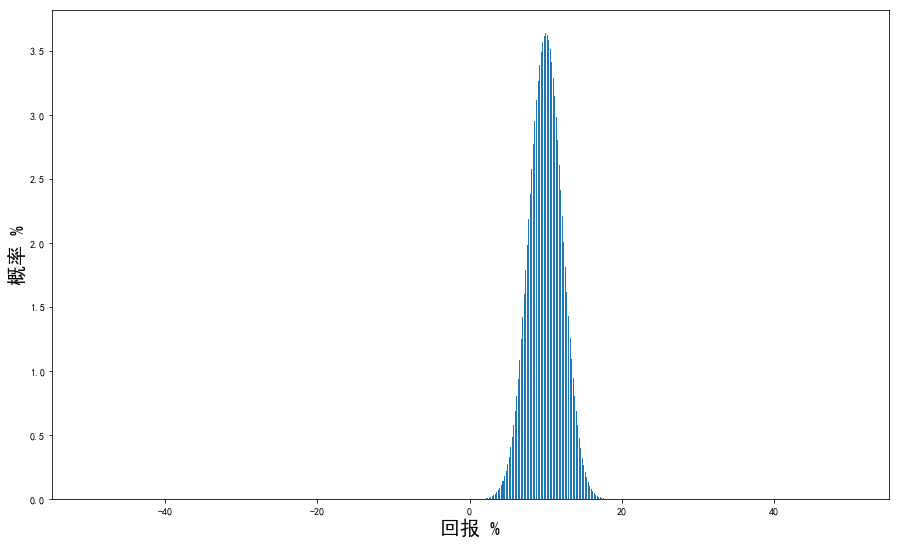

In [40]:
N = 500
prob = [stats.binom.pmf(i,N,0.6)*100 for i in range(1,N+1)]
x_of_prob_str = [str(100*(i/N-0.5))+'%' for i in range(1,N+1)]
x_of_prob = [(i/N-0.5)*100 for i in range(1,N+1)]
plt.figure(figsize=(15,9))
plt.bar(x_of_prob,prob,width = (x_of_prob[-1]-x_of_prob[-2])*2/3)
plt.xlabel('回报 %',fontsize=20)
plt.ylabel('概率 %',fontsize=20)
plt.show()

In [47]:
N = 500
0.05/np.sqrt(6/25/N)

2.282177322938192

In [48]:
N = 50
0.05/np.sqrt(6/25/N)

0.7216878364870323